In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('final_data_3481.csv')

In [3]:
#remove the first column
data = data[data.columns[1:]]

In [10]:
#assign x to all variables except boro, year, month
x = data[data.columns[5:]]
x = x.drop(columns='pct_clean_strts')
x.describe()

,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,fs_openhours,fs_open,trs_permits,paper_baskets,mgp_baskets,total_number_of_households,...,pop_density,numbldgs,unitstotal,asland_sqft,pct_lot_area_open_space,pct_lot_area_public_facility_institution,pct_lot_area_res_1_2_family_bldg,pct_lot_area_res_multifamily_walkup,restaurant,business
count,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,...,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000
mean,3628.617438,429.693019,434.024390,28.707182,347.061326,3.235564,1.032175,21.644068,22.457627,61594.033898,...,45110.495042,18619.841712,67166.440678,32.793899,12.143898,10.120847,24.405932,11.572881,876.677966,652.303074
std,1400.135685,215.199459,187.303843,60.112245,582.652592,2.170785,2.384962,25.571637,29.387903,22133.098619,...,25267.157635,16369.566494,24736.268767,75.800713,9.766513,5.605271,18.721626,7.366662,1037.125132,292.201369
min,900.200000,71.500000,107.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20628.000000,...,6208.770294,1692.000000,21902.000000,2.167357,0.710000,2.500000,0.090000,0.630000,21.000000,197.000000
25%,2476.500000,280.300000,306.800000,0.000000,30.100000,2.000000,0.000000,3.000000,3.000000,46403.000000,...,23559.314173,4642.000000,50436.000000,6.943023,3.810000,6.250000,5.670000,6.010000,192.000000,450.000000
50%,3468.600000,403.200000,407.700000,0.000000,68.800000,3.000000,0.000000,13.000000,13.000000,58056.000000,...,38177.603640,14525.000000,61225.000000,9.689811,8.150000,8.830000,22.290000,10.260000,420.000000,609.000000
75%,4627.100000,537.800000,528.600000,28.900000,292.400000,4.000000,1.000000,31.000000,33.000000,66780.000000,...,58368.648787,25111.000000,75550.000000,16.060667,19.860000,12.420000,42.470000,15.180000,1143.000000,798.000000
max,8585.700000,1492.500000,1250.500000,562.700000,2549.900000,11.000000,14.000000,125.000000,152.000000,151545.000000,...,111122.806845,71717.000000,221399.000000,517.284648,42.540000,31.680000,61.240000,31.790000,4199.000000,2083.000000


In [11]:
#normalize
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)

In [12]:
# PCA module
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

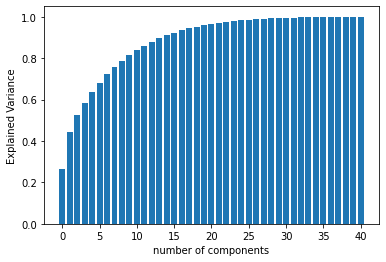

In [13]:
#perform PC decomposition over x
pca = PCA(x_scaled.shape[1])
xP = pca.fit_transform(x_scaled)

eigenvalues = pca.explained_variance_ratio_

#plot explained variance over the number of compinents
n = x_scaled.shape[1]
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("number of components")
plt.ylabel("Explained Variance")
plt.show()

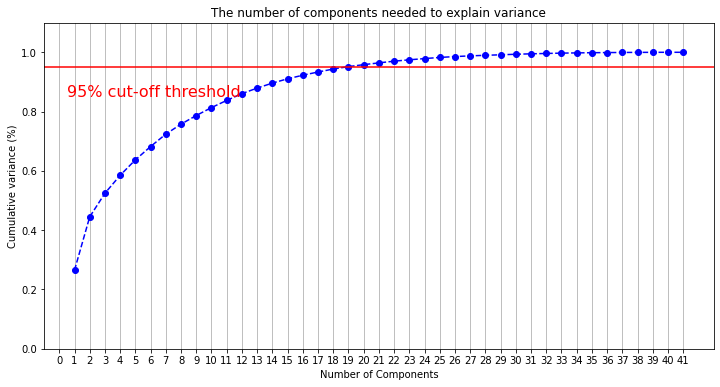

In [15]:
#from https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
pca = PCA().fit(x_scaled)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 42, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 42, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

it requires 19 components to 95% explained variance

In [16]:
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
Y = data['dirty_level']
lm=sm.OLS(Y,sm.add_constant(x)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            dirty_level   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     61.47
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:22:30   Log-Likelihood:                -3315.0
No. Observations:                3481   AIC:                             6712.
Df Residuals:                    3440   BIC:                             6964.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
np.random.seed(2018)
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(sm.add_constant(pd.DataFrame(x_scaled).iloc[:,:]),Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    res=sm.OLS(y_train,X_train).fit()
    R_IS.append(res.rsquared)   
    y_pred=res.predict(X_test)
    R_OS.append(r2_score(y_test,y_pred))
    
    #R_OS.append(1-((np.asarray(res.predict(X_test))-y_test)**2).sum()/((y_test-np.mean(y_test))**2).sum())
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

In [19]:
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=100 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(x_scaled).iloc[:,:],Y,test_size=0.3) #randomly split data into training (70%) and test (30%)
    #now apply PCA to the training data
    scaler = preprocessing.StandardScaler().fit(X_train) #introduce a scaler first as it is important to scale data before PCA!
    pca = PCA(0.95) #take only 3 leading principal components to get enough data but avoid overfitting
    P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() #fit the regression over 
    #and apply the same scaling and rotation (PCA) transform we learned for training sample to the test sample
    #this is important that we learn scaling and PCA transform from the training sample only rather than from both - training and test
    #as this is part of the principle component regression we need to train; and all training should happen over the training set
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))
    
    R_IS.append(res.rsquared)
    R_OS.append(r2_score(y_test,y_pred))
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))

IS R-squared is 0.367+-0.009
OS R-squared is 0.360+-0.020


In [22]:
# from https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

for i in range(1,len(data.columns[5:])+1):

    X = data[data.columns[5:]]
    y = data['dirty_level']

    # Splitting the dataset into the Training set and Test set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Standardize
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Apply PCA
    pca = PCA(i)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    # explained_variance = pca.explained_variance_ratio_

    # Training and Making Prediction
    classifier = RandomForestClassifier(max_depth=2, random_state=0)
    classifier.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = classifier.predict(X_test)

    # Performance Evaluation
    cm = confusion_matrix(y_test, y_pred)
    # print(cm)
    print(i, 'Accuracy: ' + str(accuracy_score(y_test, y_pred)))

1 Accuracy: 0.40459110473457677
2 Accuracy: 0.49784791965566716
3 Accuracy: 0.5021520803443329
4 Accuracy: 0.5208034433285509
5 Accuracy: 0.5265423242467718
6 Accuracy: 0.5279770444763271
7 Accuracy: 0.5251076040172167
8 Accuracy: 0.5466284074605452
9 Accuracy: 0.5351506456241033
10 Accuracy: 0.539454806312769
11 Accuracy: 0.5451936872309899
12 Accuracy: 0.5380200860832137
13 Accuracy: 0.5595408895265424
14 Accuracy: 0.5753228120516499
15 Accuracy: 0.5494978479196556
16 Accuracy: 0.5494978479196556
17 Accuracy: 0.5609756097560976
18 Accuracy: 0.5538020086083214
19 Accuracy: 0.5566714490674318
20 Accuracy: 0.5480631276901005
21 Accuracy: 0.5451936872309899
22 Accuracy: 0.5652797704447633
23 Accuracy: 0.5810616929698709
24 Accuracy: 0.5667144906743186
25 Accuracy: 0.5466284074605452
26 Accuracy: 0.563845050215208
27 Accuracy: 0.5480631276901005
28 Accuracy: 0.5710186513629842
29 Accuracy: 0.563845050215208
30 Accuracy: 0.5423242467718795
31 Accuracy: 0.5753228120516499
32 Accuracy: 0.548